<a href="https://colab.research.google.com/github/Lalithareddy04/Predictive-Modeling-for-H1b-Visa-Approval-Using-Machine-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Load the MNIST dataset

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

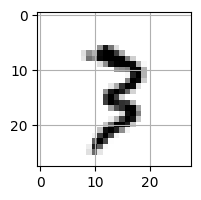

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[25000], cmap=plt.cm.binary)
plt.grid(True)
plt.show()

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Normalize the images

In [ ]:
train_images = train_images
test_images = test_images

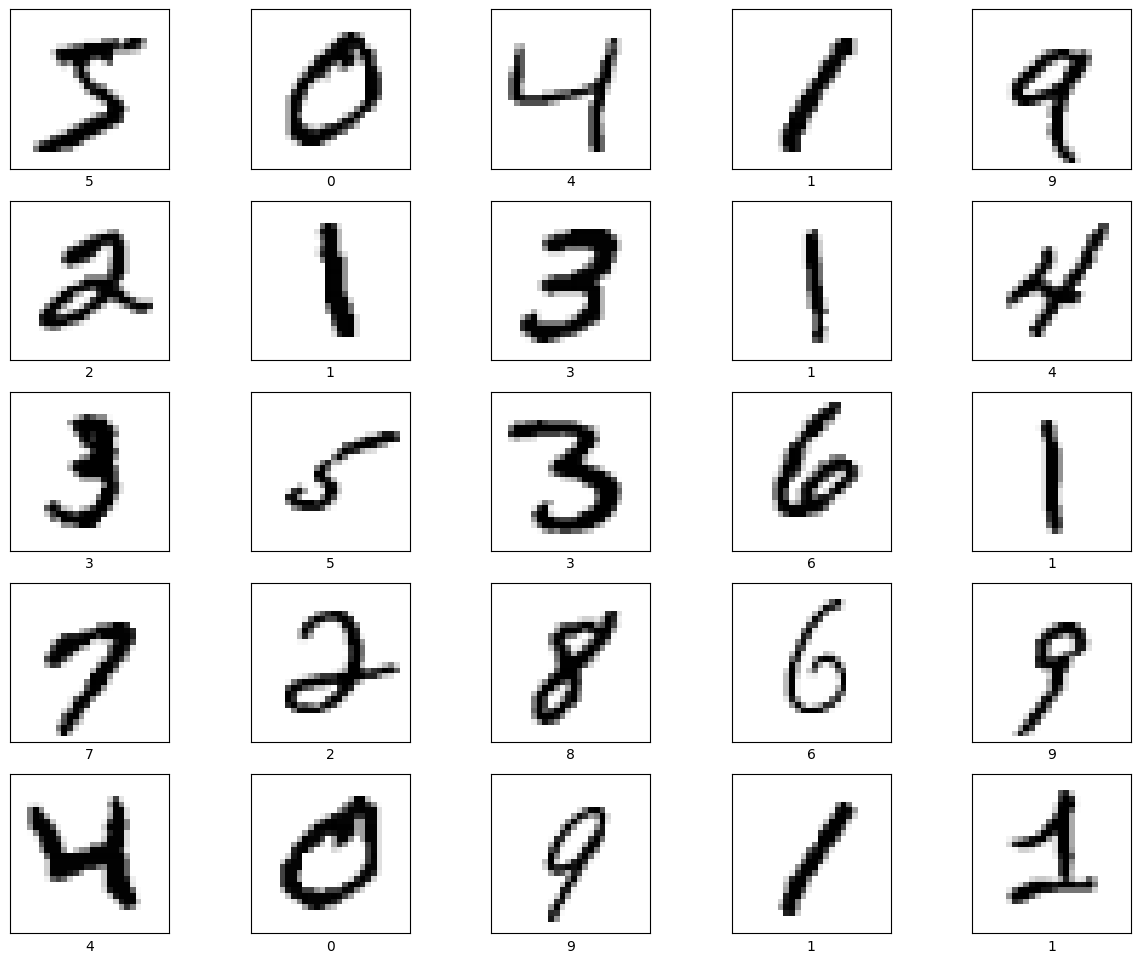

In [ ]:
plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Reshape images for CNN

In [ ]:
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

Create and compile the ANN model

In [ ]:
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Train the ANN model

In [ ]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_history = ann_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8180 - loss: 8.5102 - val_accuracy: 0.8825 - val_loss: 0.4835
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9033 - loss: 0.3919 - val_accuracy: 0.9130 - val_loss: 0.3594
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9223 - loss: 0.2951 - val_accuracy: 0.9255 - val_loss: 0.2985
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9339 - loss: 0.2512 - val_accuracy: 0.9316 - val_loss: 0.2558
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9417 - loss: 0.2278 - val_accuracy: 0.9401 - val_loss: 0.2578
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9456 - loss: 0.2108 - val_accuracy: 0.9435 - val_loss: 0.2321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9453 - loss: 0.2108 - val_accuracy: 0.9493 - val_loss: 0.2275
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9512 - loss: 0.18

Create and compile the CNN model

In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the CNN model

In [ ]:
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9010 - loss: 1.3204 - val_accuracy: 0.9751 - val_loss: 0.0859
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9808 - loss: 0.0648 - val_accuracy: 0.9711 - val_loss: 0.0993
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9838 - val_loss: 0.0517
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9873 - loss: 0.0380 - val_accuracy: 0.9834 - val_loss: 0.0568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.9859 - val_loss: 0.0484
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9851 - val_loss: 0.0533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9869 - val_loss: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9931 -

Function to plot accuracy and loss

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

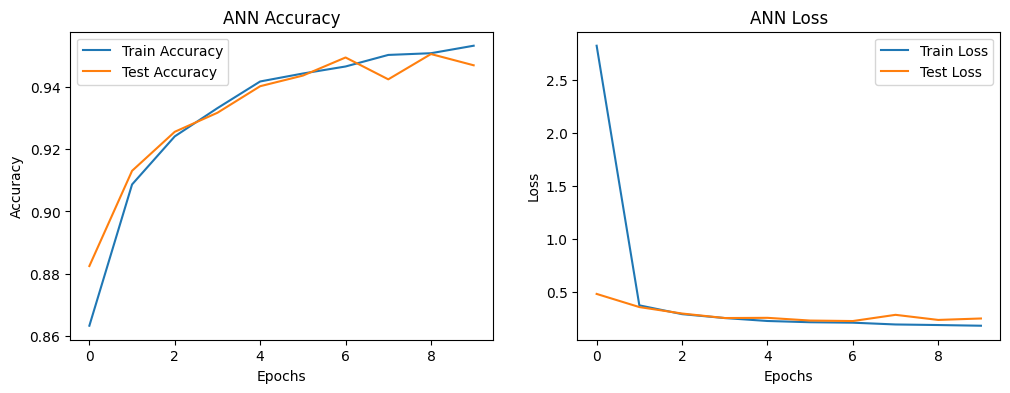

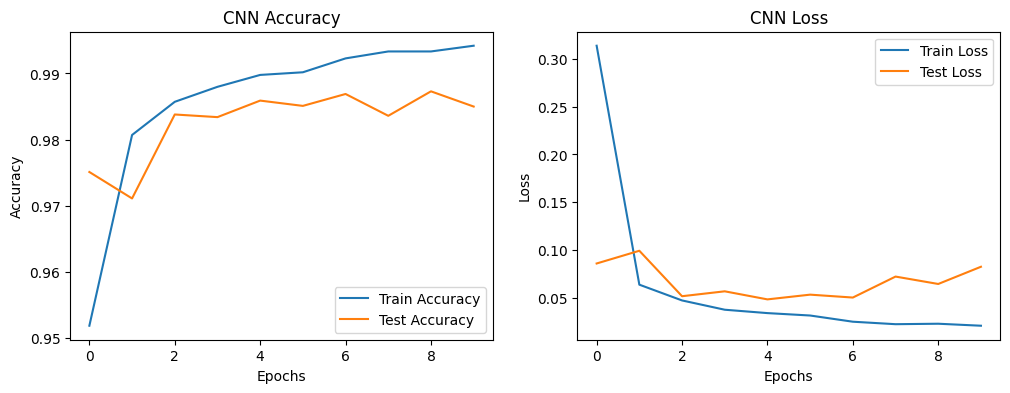

In [ ]:
plot_history(ann_history, "ANN")
plot_history(cnn_history, "CNN")

Evaluate both models

In [ ]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels)
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9424 - loss: 0.2809
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9814 - loss: 0.1017


In [ ]:
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

ANN Test Accuracy: 0.9468
CNN Test Accuracy: 0.9850
